# LAB | CNN Daily Mail Data Cleaning

## Learning Goals

This lab will help you:

- Understand and apply regular expressions (regex) to textual data
- Perform pattern matching and data extraction on natural language text
- Work hands-on with NLP use cases such as tokenization, cleaning, and identifying patterns in text
- Practice manipulating real-world text data in Python using regex

## Requirements

- Download the dataset from Kaggle: [**Human-Written Text - CNN_DailyMail**](https://www.kaggle.com/datasets/youssefelebiary/human-written-text)

## Getting Started

### Step 1: Load the Dataset

- Load the dataset `CNN_DailyMail.csv` file & examine the structure of the text data fields.

In [6]:
# Import the necessary library
import pandas as pd

import re #the regex module in the python standard library


# Load the dataset
# Replace 'path_to_your_file/' with the actual folder path where you saved the CSV file.
df = pd.read_csv('data/CNN_DailyMail.csv')

# Examine the first 5 rows to see what we're working with
df.head()

,Title,Text
0,John and . Audrey Cook were discovered alongsi...,"By . Anthony Bond . PUBLISHED: . 07:03 EST, 2 ..."
1,NEW: Libya can serve as example of cooperation...,UNITED NATIONS (CNN) -- A rare meeting of U.N....
2,Very Reverend Robert Waddington sexually abuse...,Cover-up: Former Archbishop Lord Hope allowed ...
3,Monday night's episode showed Buddy Valastro t...,"By . Kristie Lau . PUBLISHED: . 10:48 EST, 14 ..."
4,People asked to turn out lights for hour betwe...,'The lamps are going out all over Europe. We s...


In [7]:
# Let's see how long the first 5 'Text' entries are
for i in range(5):
    print(f"Row {i} - Text length: {len(df['Text'].iloc[i])} characters")
    print("------")

Row 0 - Text length: 3057 characters
------
Row 1 - Text length: 5896 characters
------
Row 2 - Text length: 3254 characters
------
Row 3 - Text length: 5661 characters
------
Row 4 - Text length: 2946 characters
------


In [8]:
df.shape
# df.columns

(7000, 2)

In [13]:
df.describe()

,Title,Text
count,7000,7000
unique,6992,7000
top,"This page includes the show Transcript, the Da...","By . Anthony Bond . PUBLISHED: . 07:03 EST, 2 ..."
freq,6,1


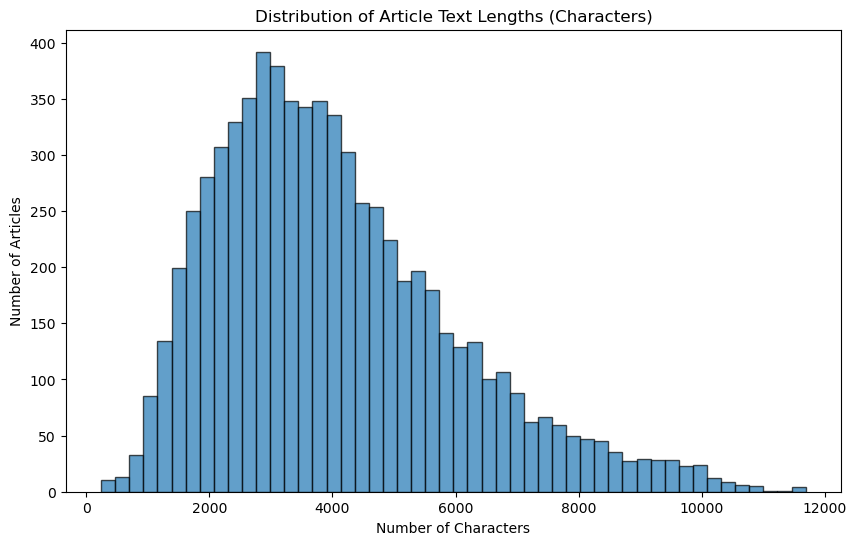

count     7000.000000
mean      4043.536714
std       1951.871094
min        244.000000
25%       2605.000000
50%       3703.500000
75%       5123.250000
max      11686.000000
Name: Text, dtype: float64


In [9]:
# Import the visualization library
import matplotlib.pyplot as plt

# Create a histogram of the 'Text' character lengths
plt.figure(figsize=(10, 6))
plt.hist(df['Text'].str.len(), bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Article Text Lengths (Characters)')
plt.xlabel('Number of Characters')
plt.ylabel('Number of Articles')
plt.show()

# Get some basic statistics
print(df['Text'].str.len().describe())

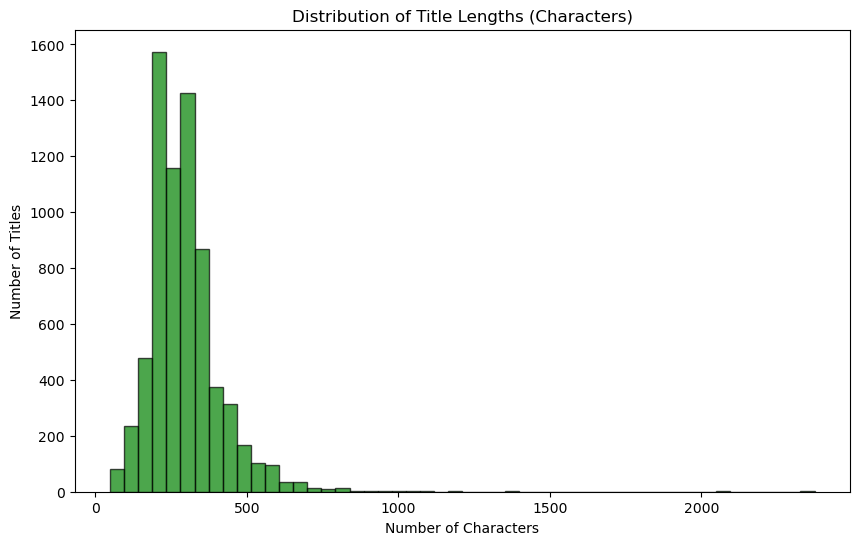

Statistics for TITLE length:
count    7000.000000
mean      293.227857
std       117.370641
min        48.000000
25%       217.000000
50%       280.000000
75%       341.000000
max      2374.000000
Name: Title, dtype: float64


In [14]:
# Create a histogram for the 'Title' character lengths
plt.figure(figsize=(10, 6))
plt.hist(df['Title'].str.len(), bins=50, edgecolor='black', alpha=0.7, color='green') # Using green to differentiate
plt.title('Distribution of Title Lengths (Characters)')
plt.xlabel('Number of Characters')
plt.ylabel('Number of Titles')
plt.show()

# Get some basic statistics for Title
print("Statistics for TITLE length:")
print(df['Title'].str.len().describe())

### Step 2: Regex Practice Tasks

Complete the following regex exercises on the text data:

*Tip:* Use Python’s `re` library and list comprehensions to efficiently process text data.


#### 1. **Extract all email addresses** present in the text.


In [20]:
# 1. Let's take just one article to experiment on
single_article = df['Text'].iloc[3]

# 2. Our pattern for finding emails ANYWHERE in a string
# This means "find this pattern ANYWHERE in the string"
email_pattern = r'\S+@\S+\.\S+'


# 3. Use findall to get a list of ALL matches in this one article
emails_found = re.findall(email_pattern, single_article)


print("Here are all emails found in the first article:")
print(emails_found)

Here are all emails found in the first article:
[]


In [23]:
# Create a test string with a fake email
test_string = "This is a test. Please contact me at example.person@example.com for more details."

# Use our same pattern and function
test_emails = re.findall(r'\S+@\S+\.\S+', test_string)

print("Test string:")
print(test_string)
print("\nEmail found in test string:")
print(test_emails)

Test string:
This is a test. Please contact me at example.person@example.com for more details.

Email found in test string:
['example.person@example.com']


In [25]:
df.size

14000

In [27]:
# Let's check the next 4 articles for emails
for i in range(1, df.shape[0]): # This will check rows 1, 2, 3, and 4
    article_text = df['Text'].iloc[i]
    emails_found = re.findall(r'\S+@\S+\.\S+', article_text)
    
    if emails_found: # If the list is NOT empty
        print(f"Found emails in row {i}: {emails_found}")
    else:
        print(f"No emails found in row {i}.")

No emails found in row 1.
No emails found in row 2.
No emails found in row 3.
No emails found in row 4.
No emails found in row 5.
No emails found in row 6.
No emails found in row 7.
No emails found in row 8.
No emails found in row 9.
No emails found in row 10.
No emails found in row 11.
No emails found in row 12.
No emails found in row 13.
No emails found in row 14.
No emails found in row 15.
No emails found in row 16.
No emails found in row 17.
No emails found in row 18.
No emails found in row 19.
No emails found in row 20.
No emails found in row 21.
No emails found in row 22.
No emails found in row 23.
No emails found in row 24.
No emails found in row 25.
No emails found in row 26.
No emails found in row 27.
No emails found in row 28.
No emails found in row 29.
No emails found in row 30.
No emails found in row 31.
No emails found in row 32.
No emails found in row 33.
No emails found in row 34.
No emails found in row 35.
No emails found in row 36.
No emails found in row 37.
No emails 

In [32]:
# Create a new column 'email_count'. For each row, apply our function and count the results.
df['email_count'] = df['Text'].apply(lambda text: len(re.findall(r'\S+@\S+\.\S+', text)))

# Now, let's get a summary of what we found!
total_emails_found = df['email_count'].sum()
articles_with_emails = (df['email_count'] > 0).sum()

print(f"Total emails found in all articles: {total_emails_found}")
print(f"Number of articles that contain at least one email: {articles_with_emails}")


Total emails found in all articles: 17
Number of articles that contain at least one email: 13


In [30]:
# If we found any, let's see a sample of those articles
if articles_with_emails > 0:
    print("\nHere are a few rows that actually contain emails:")
    # Show the first 5 rows where email_count is greater than 0
    print(df[df['email_count'] > 0][['Title', 'email_count']].head())



Here are a few rows that actually contain emails:
                                                  Title  email_count
699   Michala Hulme found the negatives in the camer...            1
918   Mackenzie Cackett, four, died of brain tumour ...            1
1938  Five teenagers and two adults with connections...            1
2990  A group of residents have transformed a cul-de...            1
4215  Including the new BMW 6 Series Convertible, Co...            1


In [33]:
# This creates a new column 'emails'. Each cell is a list of strings (the emails found).
df['emails'] = df['Text'].apply(lambda text: re.findall(r'\S+@\S+\.\S+', text))

# Let's look at the first few rows to see what we captured
print(df[['Title', 'emails']].head(10))

                                               Title emails
0  John and . Audrey Cook were discovered alongsi...     []
1  NEW: Libya can serve as example of cooperation...     []
2  Very Reverend Robert Waddington sexually abuse...     []
3  Monday night's episode showed Buddy Valastro t...     []
4  People asked to turn out lights for hour betwe...     []
5  Roy Hodgson revealed that Raheem Sterling had ...     []
6  Calls for every police officer to be offered a...     []
7  800 common pavement ants are now living on Int...     []
8  David Wilcockson, 71, was bowling at a ground ...     []
9  The boulder was found by a construction crew i...     []


In [38]:
df.emails.value_counts()

emails
[]                                                                                       6987
[sam.webb@mailonline.co.uk]                                                                 1
[news@dailymail.co.uk]                                                                      1
[tomorrow@harmless.org.uk,]                                                                 1
[mailonlinepictures@dailymail.co.uk]                                                        1
[concierge@astonmartindriving.com]                                                          1
[factcheck@cnn.com.]                                                                        1
[tacklekeown@mailonline.co.uk.]                                                             1
[asylumhotel@dailymail.co.uk]                                                               1
[feedback@cheapoair.com, celliott@ngs.org.]                                                 1
[doha@anantara.com;]                                 

In [35]:
# This creates one giant list of all emails found anywhere
all_emails = []
for text in df['Text']:
    all_emails.extend(re.findall(r'\S+@\S+\.\S+', text))

print(f"Total unique emails found in the entire dataset: {len(set(all_emails))}")
print(f"Total email occurrences: {len(all_emails)}")
print("\nA sample of the emails found:")
print(all_emails) # Print the first 10 to see what they look like

Total unique emails found in the entire dataset: 17
Total email occurrences: 17

A sample of the emails found:
['sam.webb@mailonline.co.uk', 'news@dailymail.co.uk', 'tomorrow@harmless.org.uk,', 'mailonlinepictures@dailymail.co.uk', 'concierge@astonmartindriving.com', 'factcheck@cnn.com.', 'tacklekeown@mailonline.co.uk.', 'asylumhotel@dailymail.co.uk', 'feedback@cheapoair.com', 'celliott@ngs.org.', 'doha@anantara.com;', 'factorytours@porsche.de', 'dialog@daimler.com', 'infowelt@bmw-welt.com', 'welcome@audi.de', 'president@po.gov.za,', 'fishappeal@zsl.org']


#### 2. **Find and list all URLs** embedded in the dataset.


In [45]:
# Validate URL
url_pattern_long = "^https?:\\/\\/(?:www\\.)?[-a-zA-Z0-9@:%._\\+~#=]{1,256}\\.[a-zA-Z0-9()]{1,6}\\b(?:[-a-zA-Z0-9()@:%_\\+.~#?&\\/=]*)$"
re.match(url_pattern_long, 'https://uibakery.io') # Returns Match object
re.match(url_pattern_long, 'https:/uibakery.io') # Returns None

# Extract URL from a string
url_extract_pattern = "https?:\\/\\/(?:www\\.)?[-a-zA-Z0-9@:%._\\+~#=]{1,256}\\.[a-zA-Z0-9()]{1,6}\\b(?:[-a-zA-Z0-9()@:%_\\+.~#?&\\/=]*)"
re.findall(url_extract_pattern, 'You can view more details at https://uibakery.io or just ping via email.') # returns ['https://uibakery.io']

['https://uibakery.io']

In [46]:
# 1. Let's take just one article to experiment on
single_article = df['Text'].iloc[3]

re.findall(url_extract_pattern, single_article) # returns ['https://uibakery.io']

[]

In [47]:
# Let's check URLs in the Text column:

url_extract_pattern = "https?:\\/\\/(?:www\\.)?[-a-zA-Z0-9@:%._\\+~#=]{1,256}\\.[a-zA-Z0-9()]{1,6}\\b(?:[-a-zA-Z0-9()@:%_\\+.~#?&\\/=]*)"


for i in range(1, df.shape[0]): # This will check rows 1, 2, 3, and 4
    article_text = df['Text'].iloc[i]
    emails_found = re.findall(r'\S+@\S+\.\S+', article_text)
    
    if emails_found: # If the list is NOT empty
        print(f"Found URL in row {i}: {emails_found}")
    else:
        print(f"No URL found in row {i}.")

No URL found in row 1.
No URL found in row 2.
No URL found in row 3.
No URL found in row 4.
No URL found in row 5.
No URL found in row 6.
No URL found in row 7.
No URL found in row 8.
No URL found in row 9.
No URL found in row 10.
No URL found in row 11.
No URL found in row 12.
No URL found in row 13.
No URL found in row 14.
No URL found in row 15.
No URL found in row 16.
No URL found in row 17.
No URL found in row 18.
No URL found in row 19.
No URL found in row 20.
No URL found in row 21.
No URL found in row 22.
No URL found in row 23.
No URL found in row 24.
No URL found in row 25.
No URL found in row 26.
No URL found in row 27.
No URL found in row 28.
No URL found in row 29.
No URL found in row 30.
No URL found in row 31.
No URL found in row 32.
No URL found in row 33.
No URL found in row 34.
No URL found in row 35.
No URL found in row 36.
No URL found in row 37.
No URL found in row 38.
No URL found in row 39.
No URL found in row 40.
No URL found in row 41.
No URL found in row 42.
N

In [ ]:
url_extract_pattern = "https?:\\/\\/(?:www\\.)?[-a-zA-Z0-9@:%._\\+~#=]{1,256}\\.[a-zA-Z0-9()]{1,6}\\b(?:[-a-zA-Z0-9()@:%_\\+.~#?&\\/=]*)"

In [ ]:
# This creates a new column 'emails'. Each cell is a list of strings (the emails found).
df['emails'] = df['Text'].apply(lambda text: re.findall(url_extract_pattern, text))

# Let's look at the first few rows to see what we captured
print(df[['Title', 'emails']].head(10))

In [44]:
# This creates one giant list of all URLs found anywhere

url_extract_pattern = "https?:\\/\\/(?:www\\.)?[-a-zA-Z0-9@:%._\\+~#=]{1,256}\\.[a-zA-Z0-9()]{1,6}\\b(?:[-a-zA-Z0-9()@:%_\\+.~#?&\\/=]*)"

all_urls = []
for text in df['Text']:
    all_urls.extend(re.findall(url_extract_pattern, text))

print(f"Total unique emails found in the entire dataset: {len(set(all_urls))}")
print(f"Total email occurrences: {len(all_urls)}")
print("\nA List of the URLs found:")
print(all_urls) # Print the first 10 to see what they look like

Total unique emails found in the entire dataset: 19
Total email occurrences: 19

A sample of the emails found:
['http://www.gofundme.com/lf0ga0', 'http://www.gnomeexperiment.com/', 'http://www.stbrides.com/inspire/', 'http://www.dailymail.co.uk/news/article-2069217/Daniel-gas-chamber-miracle-dog-enjoys-new-lease-life-appears-owner-U-S-chat-show.html', 'http://bit.ly/w1dDbl', 'http://www.shortlist.com/entertainment/sport/roy-keane-talks-drinking-fighting-fergie', 'http://video.foxnews.com', 'http://triggertrap.com/lapselondon/', 'http://www.findmypast.com.au/new-south-wales-wills', 'http://bit.ly/1sFCW7x', 'http://www.nordictrack.com/', 'https://www.facebook.com/pages/Benalis-Big-Run', 'http://www.cbc.ca/radio2/obamasplaylist/', 'https://www.facebook.com/Alicesfund', 'http://www.royahakakian.com/live/.', 'http://video.heraldsun.com.au/2323699698/Emergency-landing', 'https://mail.yahoo-inc.com.For', 'http://www.nbcnewyork.com/templates/nbc_partner_player?cmsID=', 'http://st7870.wix.com/t

In [43]:
# Create a new column 'url_count' for the number of URLs in each article
df['url_count'] = df['Text'].apply(lambda text: len(re.findall(r'https?://\S+', text)))

# Get a summary for the entire dataset
total_urls_found = df['url_count'].sum()
articles_with_urls = (df['url_count'] > 0).sum()

print(f"Total URLs found in all articles: {total_urls_found}")
print(f"Number of articles that contain at least one URL: {articles_with_urls}")

# Let's also see the distribution - how many URLs do articles usually have?
print("\nSummary of URL counts per article:")
print(df['url_count'].describe())


Total URLs found in all articles: 19
Number of articles that contain at least one URL: 18

Summary of URL counts per article:
count    7000.000000
mean        0.002714
std         0.054709
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: url_count, dtype: float64


In [51]:
# Define all our regex patterns at the top for easy access and editing
URL_PATTERN = r'https?://\S+'
url_pattern_long = "https?:\\/\\/(?:www\\.)?[-a-zA-Z0-9@:%._\\+~#=]{1,256}\\.[a-zA-Z0-9()]{1,6}\\b(?:[-a-zA-Z0-9()@:%_\\+.~#?&\\/=]*)"

# EMAIL_PATTERN = r'\S+@\S+\.\S+'  # You can add your email pattern here too if you want!

# --- Find and List ALL URLs in the Dataset ---
# This list will contain every single URL found in any 'Title' or 'Text'
all_urls_list = []

# 1. Search through every 'Title'
for title_text in df['Title']:
    found_urls = re.findall(URL_PATTERN, title_text)
    all_urls_list.extend(found_urls) # Add whatever was found to our big list

# 2. Search through every 'Text'
for article_text in df['Text']:
    found_urls = re.findall(URL_PATTERN, article_text)
    all_urls_list.extend(found_urls) # Add whatever was found to our big list

# Print the final results
print(f"Total unique URLs found in the entire dataset: {len(set(all_urls_list))}")
print(f"Total URL occurrences: {len(all_urls_list)}")
print("\nA sample of the URLs found:")
print(all_urls_list[:15]) # Print the first 15 to see what they look like

Total unique URLs found in the entire dataset: 19
Total URL occurrences: 19

A sample of the URLs found:
['http://www.gofundme.com/lf0ga0', 'http://www.gnomeexperiment.com/', 'http://www.stbrides.com/inspire/', "http://www.dailymail.co.uk/news/article-2069217/Daniel-gas-chamber-miracle-dog-enjoys-new-lease-life-appears-owner-U-S-chat-show.html',", 'http://bit.ly/w1dDbl', 'http://www.shortlist.com/entertainment/sport/roy-keane-talks-drinking-fighting-fergie', "http://video.foxnews.com'&amp;gt;video.foxnews.com&amp;lt;/a&amp;gt;", 'http://triggertrap.com/lapselondon/', 'http://www.findmypast.com.au/new-south-wales-wills,', 'http://bit.ly/1sFCW7x', 'http://www.nordictrack.com/', 'https://www.facebook.com/pages/Benalis-Big-Run', 'http://www.cbc.ca/radio2/obamasplaylist/', 'https://www.facebook.com/Alicesfund', 'http://www.royahakakian.com/live/.']


#### 3. **Identify all phone numbers** using regex patterns typical to various country formats.


In [52]:
# Define our phone number pattern at the top
# This pattern looks for: optional country code (+1), then 3 digits, separator, 3 digits, separator, 4 digits.
PHONE_PATTERN = r'(\+\d{1,3}[-.\s]?)?\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}'

# Let's test it on some examples first
test_numbers = [
    "(123) 456-7890",
    "123-456-7890",
    "123.456.7890",
    "+1 123 456 7890",
    "This is not a number: 12345"
]

print("Testing our phone pattern:")
for test in test_numbers:
    matches = re.findall(PHONE_PATTERN, test)
    print(f"Text: '{test}' -> Found: {matches}")

Testing our phone pattern:
Text: '(123) 456-7890' -> Found: ['']
Text: '123-456-7890' -> Found: ['']
Text: '123.456.7890' -> Found: ['']
Text: '+1 123 456 7890' -> Found: ['+1 ']
Text: 'This is not a number: 12345' -> Found: []


In [53]:
# Apply to the entire dataset
df['phone_count'] = df['Text'].apply(lambda text: len(re.findall(PHONE_PATTERN, text)))

# Get summary statistics
total_phones = df['phone_count'].sum()
articles_with_phones = (df['phone_count'] > 0).sum()

print(f"Total phone number occurrences found: {total_phones}")
print(f"Number of articles containing phone numbers: {articles_with_phones}")

# If we find any, let's see them
if articles_with_phones > 0:
    print("\nSample of articles with phone numbers:")
    sample_df = df[df['phone_count'] > 0][['Title', 'phone_count']].head()
    print(sample_df)

Total phone number occurrences found: 42
Number of articles containing phone numbers: 34

Sample of articles with phone numbers:
                                                  Title  phone_count
717   Not everyone is a Noel fan . Morocco is a pere...            2
883   Association of British Travel Agents has named...            2
918   Mackenzie Cackett, four, died of brain tumour ...            1
944   Crystal Morrison called a friend to pick her u...            1
1009  Two men have targeted house in Salford, Greate...            1


In [54]:
# Let's create a list to capture the actual phone number matches, not just the count
all_phone_matches = []

# Loop through the DataFrame and collect the actual matches
for index, row in df.iterrows():
    matches_in_text = re.findall(PHONE_PATTERN, row['Text'])
    if matches_in_text:
        # For each match found, save the article title and the match itself
        for match in matches_in_text:
            all_phone_matches.append({
                'Title': row['Title'],
                'Matched_Text': match
            })

# Create a DataFrame to inspect the results easily
phone_matches_df = pd.DataFrame(all_phone_matches)

# Display ALL the matches we found
print("All potential phone numbers found in the dataset:")
print(phone_matches_df)

# Optional: If the list is long, just look at the first 20
# print(phone_matches_df.head(20))

All potential phone numbers found in the dataset:
                                                Title Matched_Text
0   Not everyone is a Noel fan . Morocco is a pere...         +91 
1   Not everyone is a Noel fan . Morocco is a pere...          +1 
2   Association of British Travel Agents has named...          +1 
3   Association of British Travel Agents has named...         +52 
4   Mackenzie Cackett, four, died of brain tumour ...             
5   Crystal Morrison called a friend to pick her u...             
6   Two men have targeted house in Salford, Greate...             
7   Robin Givens, Denise Brown talk about women an...             
8   Man captured on CCTV robbing three gas station...             
9   Father Anthony Sweeney and John Stingemore arr...             
10  The products are sold by Wal-Mart and Kroger ....             
11  Hard times are forcing Italy's counts and coun...         +39 
12  Ruth McDonagh was repeatedly turned away by do...             
13  Bernstei

In [55]:
# Define a NEW pattern using NON-CAPTURING groups (?:...)
# This tells regex to group for the 'optional' logic but not to return it as a separate result.
PHONE_PATTERN_FIXED = r'(?:\+\d{1,3}[-.\s]?)?\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}'

# Test it on the same problematic examples
test_numbers = ["+91 123-456-7890", "Call me at 123-456-7890 please."]
print("Testing the FIXED pattern:")
for test in test_numbers:
    matches = re.findall(PHONE_PATTERN_FIXED, test)
    print(f"Text: '{test}' -> Found: {matches}")

Testing the FIXED pattern:
Text: '+91 123-456-7890' -> Found: ['+91 123-456-7890']
Text: 'Call me at 123-456-7890 please.' -> Found: ['123-456-7890']


In [56]:
# Apply the FIXED pattern to the entire dataset to get the actual numbers
all_phone_matches_fixed = []

for index, row in df.iterrows():
    matches_in_text = re.findall(PHONE_PATTERN_FIXED, row['Text'])
    if matches_in_text:
        for match in matches_in_text:
            all_phone_matches_fixed.append({
                'Title': row['Title'],
                'Matched_Text': match
            })

# Create a DataFrame to inspect the results
phone_matches_fixed_df = pd.DataFrame(all_phone_matches_fixed)
print("All potential phone numbers found (with FIXED pattern):")
print(phone_matches_fixed_df)

All potential phone numbers found (with FIXED pattern):
                                                Title      Matched_Text
0   Not everyone is a Noel fan . Morocco is a pere...  +91 471 227 3093
1   Not everyone is a Noel fan . Morocco is a pere...   +1 504 200 6523
2   Association of British Travel Agents has named...   +1 305 947 3525
3   Association of British Travel Agents has named...  +52 322 222 5040
4   Mackenzie Cackett, four, died of brain tumour ...      203 615 1154
5   Crystal Morrison called a friend to pick her u...    (704) 920-5580
6   Two men have targeted house in Salford, Greate...      161 856 5097
7   Robin Givens, Denise Brown talk about women an...      800-799-7233
8   Man captured on CCTV robbing three gas station...      269-983-7141
9   Father Anthony Sweeney and John Stingemore arr...      808 800 5000
10  The products are sold by Wal-Mart and Kroger ....      800-367-7412
11  Hard times are forcing Italy's counts and coun...   +39 049 9350340
12  Ruth

In [57]:
# The number of rows in the DataFrame is the total number of phone number occurrences found
total_valid_phones = len(phone_matches_fixed_df)

# To see how many unique phone numbers were found (if any were repeated)
unique_valid_phones = phone_matches_fixed_df['Matched_Text'].nunique()

print("=== FINAL PHONE NUMBER COUNT ===")
print(f"Total valid phone number occurrences found: {total_valid_phones}")
print(f"Number of unique phone numbers found: {unique_valid_phones}")

# This confirms the count matches our earlier summary from the 'phone_count' column
print(f"This matches our earlier count: {total_valid_phones == df['phone_count'].sum()}")

=== FINAL PHONE NUMBER COUNT ===
Total valid phone number occurrences found: 42
Number of unique phone numbers found: 40
This matches our earlier count: True


#### 4. **Clean the text** by removing special characters, punctuation, and extra spaces.


In [58]:
# Define our cleaning pattern
CLEANING_PATTERN = r'[^a-zA-Z0-9\s]'

# Create a messy test sentence
test_dirty_text = "This is    a messy text!!! With numbers 123, symbols @#$, and (punctuation)."
print("Original dirty text:")
print(test_dirty_text)

# Step 1: Remove all non-alphanumeric/space characters
clean_text = re.sub(CLEANING_PATTERN, '', test_dirty_text)
print("\nAfter removing special characters:")
print(clean_text)

# Step 2: Replace multiple spaces with a single space
# We can use a second regex for this: r'\s+' finds one or more whitespace characters
final_clean_text = re.sub(r'\s+', ' ', clean_text).strip()
print("\nAfter removing extra spaces:")
print(final_clean_text)

Original dirty text:
This is    a messy text!!! With numbers 123, symbols @#$, and (punctuation).

After removing special characters:
This is    a messy text With numbers 123 symbols  and punctuation

After removing extra spaces:
This is a messy text With numbers 123 symbols and punctuation


In [59]:
# Create a function to clean any text
def clean_text(text):
    # 1. Remove special chars/punctuation
    text_no_special = re.sub(CLEANING_PATTERN, '', text)
    # 2. Collapse multiple spaces into one and trim leading/trailing spaces
    text_clean = re.sub(r'\s+', ' ', text_no_special).strip()
    return text_clean

# Apply the function to the first article to see the before and after
first_article_text = df['Text'].iloc[0]
first_article_cleaned = clean_text(first_article_text)

print("=== BEFORE CLEANING (first 500 chars) ===")
print(first_article_text[:500])
print("\n=== AFTER CLEANING (first 500 chars) ===")
print(first_article_cleaned[:500])

=== BEFORE CLEANING (first 500 chars) ===
By . Anthony Bond . PUBLISHED: . 07:03 EST, 2 March 2013 . | . UPDATED: . 08:07 EST, 2 March 2013 . Three members of the same family who died in a static caravan from carbon monoxide poisoning would have been unconscious 'within minutes', investigators said today. The bodies of married couple John and Audrey Cook were discovered alongside their daughter, Maureen, at the mobile home they shared on Tremarle Home Park in Camborne, west Cornwall. The inquests have now opened into the deaths last Sat

=== AFTER CLEANING (first 500 chars) ===
By Anthony Bond PUBLISHED 0703 EST 2 March 2013 UPDATED 0807 EST 2 March 2013 Three members of the same family who died in a static caravan from carbon monoxide poisoning would have been unconscious within minutes investigators said today The bodies of married couple John and Audrey Cook were discovered alongside their daughter Maureen at the mobile home they shared on Tremarle Home Park in Camborne west Cornwal

In [61]:
# Apply the cleaning function to create new columns with cleaned text
# df['Title_Cleaned'] = df['Title'].apply(clean_text)
df['Text_Cleaned'] = df['Text'].apply(clean_text)

# Let's compare the original and cleaned versions for the first few rows
print("=== SAMPLE COMPARISON ===")
sample_to_show = 3  # Number of rows to display

for i in range(sample_to_show):
    print(f"\n--- Row {i} ---")
    # # print("Original Title:", df['Title'].iloc[i])
    # print("Cleaned Title: ", df['Title_Cleaned'].iloc[i])
    # print("---")
    # Just show the first 200 characters of the text to avoid too much output
    print("Original Text (first 200 chars):", df['Text'].iloc[i][:200])
    print("Cleaned Text (first 200 chars): ", df['Text_Cleaned'].iloc[i][:200])
    print("\n" + "="*50)

=== SAMPLE COMPARISON ===

--- Row 0 ---
Original Text (first 200 chars): By . Anthony Bond . PUBLISHED: . 07:03 EST, 2 March 2013 . | . UPDATED: . 08:07 EST, 2 March 2013 . Three members of the same family who died in a static caravan from carbon monoxide poisoning would h
Cleaned Text (first 200 chars):  By Anthony Bond PUBLISHED 0703 EST 2 March 2013 UPDATED 0807 EST 2 March 2013 Three members of the same family who died in a static caravan from carbon monoxide poisoning would have been unconscious w


--- Row 1 ---
Original Text (first 200 chars): UNITED NATIONS (CNN) -- A rare meeting of U.N. Security Council heads of state, led for the first time by a U.S. president, adopted a resolution focused on stopping the spread of nuclear weapons Thurs
Cleaned Text (first 200 chars):  UNITED NATIONS CNN A rare meeting of UN Security Council heads of state led for the first time by a US president adopted a resolution focused on stopping the spread of nuclear weapons Thursday Preside


--- R

In [63]:
df.head()


,Title,Text,email_count,emails,url_count,phone_count,Text_Cleaned
0,John and . Audrey Cook were discovered alongsi...,"By . Anthony Bond . PUBLISHED: . 07:03 EST, 2 ...",0,[],0,0,By Anthony Bond PUBLISHED 0703 EST 2 March 201...
1,NEW: Libya can serve as example of cooperation...,UNITED NATIONS (CNN) -- A rare meeting of U.N....,0,[],0,0,UNITED NATIONS CNN A rare meeting of UN Securi...
2,Very Reverend Robert Waddington sexually abuse...,Cover-up: Former Archbishop Lord Hope allowed ...,0,[],0,0,Coverup Former Archbishop Lord Hope allowed a ...
3,Monday night's episode showed Buddy Valastro t...,"By . Kristie Lau . PUBLISHED: . 10:48 EST, 14 ...",0,[],0,0,By Kristie Lau PUBLISHED 1048 EST 14 June 2012...
4,People asked to turn out lights for hour betwe...,'The lamps are going out all over Europe. We s...,0,[],0,0,The lamps are going out all over Europe We sha...


#### 5. **Extract dates and times** mentioned in the text (e.g., “January 5, 2023” or “5:00 PM”).


In [64]:
# Define a pattern for common date formats
# This pattern tries to match: Month Day, Year OR Day Month Year OR YYYY-MM-DD, etc.
DATE_PATTERN = r'\b(?:\d{1,2}[-/]\d{1,2}[-/]\d{2,4}|\d{2,4}[-/]\d{1,2}[-/]\d{1,2}|(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]*\.?\s*\d{1,2},?\s*\d{2,4})\b'

# Define a pattern for common time formats
# This pattern tries to match: HH:MM AM/PM OR HH:MM:SS OR HHmm
TIME_PATTERN = r'\b\d{1,2}:\d{2}(?::\d{2})?\s*(?:AM|PM)?\b'

# Test the patterns on some examples
test_strings = [
    "The event is on January 5, 2023 at 5:00 PM.",
    "The deadline is 2023-01-05 or maybe 12/05/23.",
    "She arrived at 15:30:45 precisely.",
    "This is not a date: 12345"
]

print("Testing Date and Time Patterns:")
for test in test_strings:
    date_matches = re.findall(DATE_PATTERN, test, flags=re.IGNORECASE)  # Ignore case for month names
    time_matches = re.findall(TIME_PATTERN, test, flags=re.IGNORECASE)
    print(f"\nText: '{test}'")
    print(f"Dates found: {date_matches}")
    print(f"Times found: {time_matches}")

Testing Date and Time Patterns:

Text: 'The event is on January 5, 2023 at 5:00 PM.'
Dates found: ['January 5, 2023']
Times found: ['5:00 PM']

Text: 'The deadline is 2023-01-05 or maybe 12/05/23.'
Dates found: ['2023-01-05', '12/05/23']
Times found: []

Text: 'She arrived at 15:30:45 precisely.'
Dates found: []
Times found: ['15:30:45 ']

Text: 'This is not a date: 12345'
Dates found: []
Times found: []


In [65]:
# Apply to the entire dataset
df['date_count'] = df['Text'].apply(lambda text: len(re.findall(DATE_PATTERN, text, flags=re.IGNORECASE)))
df['time_count'] = df['Text'].apply(lambda text: len(re.findall(TIME_PATTERN, text, flags=re.IGNORECASE)))

# Get summary statistics
total_dates = df['date_count'].sum()
total_times = df['time_count'].sum()

print(f"Total date mentions found: {total_dates}")
print(f"Total time mentions found: {total_times}")

# Let's see the articles with the most date mentions
if total_dates > 0:
    print("\nArticles with the most date mentions:")
    print(df[['Title', 'date_count']].nlargest(5, 'date_count'))

Total date mentions found: 5861
Total time mentions found: 3412

Articles with the most date mentions:
                                                  Title  date_count
5106  Police 'scoping information' and 'assessing it...          29
2014  Sue Cook, 65, told trial she had forgotten 'lo...          21
3489  The figures were collected by Germany-based IT...          21
6872  Bruce Harris, 90, who acted as his brother's m...          20
4442  Rodney King was found dead in his swimming poo...          17


In [67]:
# Lists to hold all found dates and times
all_dates = []
all_times = []

# Loop through each row and extract the matches
for index, row in df.iterrows():
    # Find all dates in the article Text
    dates_in_text = re.findall(DATE_PATTERN, row['Text'], flags=re.IGNORECASE)
    for date in dates_in_text:
        all_dates.append({'Title': row['Title'], 'Date': date})
    
    # Find all times in the article Text
    times_in_text = re.findall(TIME_PATTERN, row['Text'], flags=re.IGNORECASE)
    for time in times_in_text:
        all_times.append({'Title': row['Title'], 'Time': time})

# Create DataFrames for inspection
dates_df = pd.DataFrame(all_dates)
times_df = pd.DataFrame(all_times)

# Print the results
print("=== EXTRACTED DATES ===")
print(f"Total unique date strings found: {len(dates_df)}")
if not dates_df.empty:
    print(dates_df.head(10)) # Show first 10 dates

print("\n=== EXTRACTED TIMES ===")
print(f"Total unique time strings found: {len(times_df)}")
if not times_df.empty:
    print(times_df.head(10)) # Show first 10 times

=== EXTRACTED DATES ===
Total unique date strings found: 5861
                                               Title            Date
0  John and . Audrey Cook were discovered alongsi...      March 2013
1  John and . Audrey Cook were discovered alongsi...      March 2013
2  Monday night's episode showed Buddy Valastro t...       June 2012
3  Monday night's episode showed Buddy Valastro t...       June 2012
4  People asked to turn out lights for hour betwe...  August 3, 1914
5  David Wilcockson, 71, was bowling at a ground ...       June 2012
6  David Wilcockson, 71, was bowling at a ground ...       June 2012
7  The boulder was found by a construction crew i...    maybe 18,000
8  £40 tour was part of 'Amazing Autumn Auction' ...   November 2013
9  £40 tour was part of 'Amazing Autumn Auction' ...   November 2013

=== EXTRACTED TIMES ===
Total unique time strings found: 3412
                                               Title     Time
0  John and . Audrey Cook were discovered alongsi...  

#### 6. **Count the occurrences of specific keywords or patterns**, such as “AI”, “machine learning”, or hashtags.


In [68]:
# Define the keywords we want to search for
KEYWORDS = {
    'AI': r'\bAI\b',  # The pattern \bAI\b means "find 'AI' as a whole word"
    'Machine_Learning': r'\bmachine learning\b'
}

# Create a new column for each keyword count
for keyword_name, pattern in KEYWORDS.items():
    # The (?i) flag makes the search case-insensitive for this pattern
    df[f'count_{keyword_name}'] = df['Text'].str.count(pattern, flags=re.IGNORECASE)

# Print the total counts for each keyword
print("=== KEYWORD COUNT SUMMARY ===")
for keyword_name in KEYWORDS:
    total_count = df[f'count_{keyword_name}'].sum()
    print(f"Total occurrences of '{keyword_name}': {total_count}")

# Show articles that mention 'AI'
ai_articles = df[df['count_AI'] > 0]
if not ai_articles.empty:
    print(f"\nNumber of articles mentioning 'AI': {len(ai_articles)}")
    print(ai_articles[['Title', 'count_AI']].head())

=== KEYWORD COUNT SUMMARY ===
Total occurrences of 'AI': 32
Total occurrences of 'Machine_Learning': 2

Number of articles mentioning 'AI': 7
                                                  Title  count_AI
86    Solid but completely uninspired third-person g...         1
720   Chinese police stationed outside cemetery wher...         1
1315  Comments follow Stephen Hawking's warning that...         8
2277  Man stood outside Shanghai university offering...         3
5753  Ai Jing, a popular singer, represents one scho...        14


In [69]:
# Define the hashtag pattern
HASHTAG_PATTERN = r'#\w+'

# Count hashtags in each article
df['count_hashtag'] = df['Text'].str.count(HASHTAG_PATTERN)

# Print the total count of hashtags
total_hashtags = df['count_hashtag'].sum()
print(f"\nTotal hashtag occurrences found: {total_hashtags}")

# Let's also extract some examples to see what they are
all_hashtags = []
for text in df['Text']:
    all_hashtags.extend(re.findall(HASHTAG_PATTERN, text))

print(f"Sample of hashtags found: {all_hashtags[:10]}") # Show first 10



Total hashtag occurrences found: 223
Sample of hashtags found: ['#HotJesus', '#Playstation2013', '#playstation2013', '#playstation2013', '#PS4', '#ShadesofRevlon', '#ShadesOfRevlon', '#block', '#1', '#1']


#### 7. **Split the text into sentences** or words using regex delimiters.


In [70]:
# Define a pattern for sentence splitting: . ! or ? followed by a space
SENTENCE_PATTERN = r'(?<=[.!?])\s+'

# Test it on a sample text
test_paragraph = "This is the first sentence. Is this the second? Yes! And this is the fourth."
sentences = re.split(SENTENCE_PATTERN, test_paragraph)
print("=== SENTENCE SPLITTING TEST ===")
print("Original paragraph:")
print(test_paragraph)
print("\nSplit sentences:")
for i, sentence in enumerate(sentences, 1):
    print(f"{i}. {sentence}")

=== SENTENCE SPLITTING TEST ===
Original paragraph:
This is the first sentence. Is this the second? Yes! And this is the fourth.

Split sentences:
1. This is the first sentence.
2. Is this the second?
3. Yes!
4. And this is the fourth.


In [71]:
# Define a pattern for word splitting: one or more non-word characters
WORD_PATTERN = r'\W+'

# Test it on a sample sentence
test_sentence = "This is a sample sentence: it has punctuation, numbers 123, and symbols!"
words = re.split(WORD_PATTERN, test_sentence)
# The split might result in empty strings, so we filter them out
words = [word for word in words if word != '']
print("\n=== WORD SPLITTING TEST ===")
print("Original sentence:")
print(test_sentence)
print("\nSplit words:")
print(words)


=== WORD SPLITTING TEST ===
Original sentence:
This is a sample sentence: it has punctuation, numbers 123, and symbols!

Split words:
['This', 'is', 'a', 'sample', 'sentence', 'it', 'has', 'punctuation', 'numbers', '123', 'and', 'symbols']


In [72]:
# Define a pattern for word splitting: one or more non-word characters
WORD_PATTERN = r'\W+'

# Test it on a sample sentence
test_sentence = "This is a sample sentence: it has punctuation, numbers 123, and symbols!"
words = re.split(WORD_PATTERN, test_sentence)
# The split might result in empty strings, so we filter them out
words = [word for word in words if word != '']
print("\n=== WORD SPLITTING TEST ===")
print("Original sentence:")
print(test_sentence)
print("\nSplit words:")
print(words)


=== WORD SPLITTING TEST ===
Original sentence:
This is a sample sentence: it has punctuation, numbers 123, and symbols!

Split words:
['This', 'is', 'a', 'sample', 'sentence', 'it', 'has', 'punctuation', 'numbers', '123', 'and', 'symbols']


In [73]:
# Apply sentence splitting to the first article's text
first_article_text = df['Text'].iloc[0]
sentences_in_article = re.split(SENTENCE_PATTERN, first_article_text)

print("=== FIRST ARTICLE - SENTENCE SPLIT ===")
print(f"Number of sentences in the first article: {len(sentences_in_article)}")
print("\nFirst 5 sentences:")
for i, sentence in enumerate(sentences_in_article[:5], 1):
    print(f"{i}. {sentence[:100]}...") # Print first 100 chars of each sentence

=== FIRST ARTICLE - SENTENCE SPLIT ===
Number of sentences in the first article: 42

First 5 sentences:
1. By ....
2. Anthony Bond ....
3. PUBLISHED: ....
4. 07:03 EST, 2 March 2013 ....
5. | ....



*Tip:* Use Python’s `re` library and list comprehensions to efficiently process text data.

***

## Deliverables

- Submitted notebook with your responses to each of the exercises.